# Sphere Packing

### Carpa de Melquíades, oct 2022
#### Krystifer Campos - Universidad del Valle

----------------------------

Ideal gases, or the atomic structure of condensed matter, can be modeled to a first approximation from a classical point of view. Consider finite solid spheres inside a cube, like billiard balls (usually called discs if they are in two dimensions). We can model the dynamics of the system using the equations of kinematics and conservation of linear momentum, but we can also approximate from statistics. In this code, the MCMC (Markov Chain Monte Carlo) algorithm is performed to show the characteristic of the packing of spheres. The base of this code is the book : Algorithms and Computations by Werner Krauth, and the Coursera Course [Statistical Mechanics: Algorithms and Computations](https://www.coursera.org/?skipBrowseRedirect=true).

-----------------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
from matplotlib.animation import PillowWriter
import random, math
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

### Initial conditions

To generate the initial configuration, we randomly assign (with uniform probability) the position of N particles on a three and two-dimensional grid. Each particle has a radius "sigma", whenever the distance between centres is less than twice the radius, there is an overlap. Overlaps are not allowed, so we apply the "Tabula rasa" rule, this is, to clear up the entire configuration and start from scratch. This procedure, though slow is consistent with the principle of having an equal probability for each possible configuration as an initial condition.

In [2]:
def direct_disks_box2D(N, sigma):               #Generate initial condition with equal probability in 2D
    condition = False
    while condition == False:
        L = [(random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma))]
        for k in range(1, N):
            a = (random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma))
            min_dist = min(math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) for b in L) 
            if min_dist < 2.0 * sigma: 
                condition = False
                break
            else:
                L.append(a)
                condition = True
    return L

In [3]:
def direct_disks_box3D(N, sigma):               #Generate initial condition with equal probability in 3D
    condition = False
    while condition == False:
        L = [(random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma))]
        for k in range(1, N):
            a = (random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma),  random.uniform(sigma, 1.0 - sigma))
            min_dist = min(math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2 + (a[2] - b[2]) ** 2) for b in L) 
            if min_dist < 2.0 * sigma: 
                condition = False
                break
            else:
                L.append(a)
                condition = True
    return L

In [4]:
def drawSphere(xCenter, yCenter, zCenter, r):          # Function to draw spheres
    #draw sphere
    u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:50j]
    x=np.cos(u)*np.sin(v)
    y=np.sin(u)*np.sin(v)
    z=np.cos(v)
    # shift and scale sphere
    x = r*x + xCenter
    y = r*y + yCenter
    z = r*z + zCenter
    return (x,y,z)

-------------------------------------------------------------------------------------

### Animation and method

Once the initial configuration is set, we create Markov Chains by changing the position of a random sphere by a random number in each coordinate, being this number in a finite interval (-delta, delta).  In each event, we check for overlaps, if overlap occurs we let the configuration equal and repeat the random process. We also check each particle inside the box, for example, in the two-dimensional case, the x and y components must be within the range (sigma, 1-sigma). The animation is done by merging successive snapshots of the system in gif format.

In [5]:
def animate(i):
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    a = random.choice(L)
    b = np.asarray([a[0] + random.uniform(-delta, delta), a[1] + random.uniform(-delta, delta)])
    min_dist = min((b[0] - c[0]) ** 2 + (b[1] - c[1]) ** 2 for c in L if c[0] != a[0] and c[1] !=a[1]) 
    box_cond = min(b[0], b[1]) < sigma or max(b[0], b[1]) > 1.0 - sigma
    if not (box_cond or min_dist < 4.0 * sigma ** 2):
        a[:] = b
        L[L==a]=b
        ax.clear()
        circles = [plt.Circle((xi,yi), radius = sigma, linewidth = 0.1) for xi,yi in zip(L[:,0],L[:,1])]
        circlesCollect = matplotlib.collections.PatchCollection(circles, facecolors = colors)
        ax.add_collection(circlesCollect)

<IPython.core.display.Javascript object>


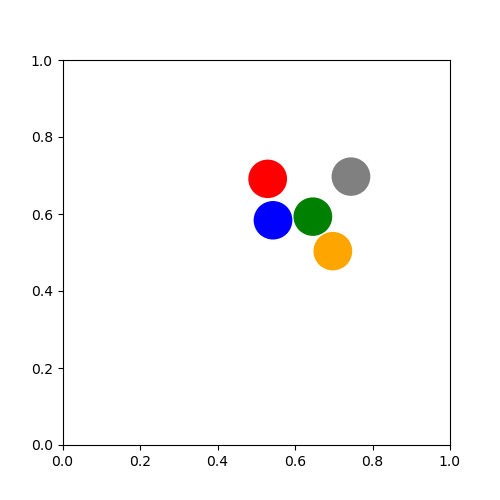

In [6]:
fig2d, ax = plt.subplots(1,1, figsize=(5,5))                #Animation for 2D hard disks
N=5
sigma = 0.05
delta = 0.2
colors = ['r', 'b', 'g', 'orange', 'gray', 'olive', 'gold', 'teal', 'chocolate', 'crimson', 'purple', 'lime']
L = np.asarray(direct_disks_box2D(N, sigma))
ani = animation.FuncAnimation(fig2d, animate, frames=800, interval = 0.1)
#ani.save('yourpath/mcmc2D.gif', writer = 'pillow', dpi = 100) 

The animation for 3-dimensional disks is the same, just adding an extra coordinate and drawing the points as spheres.

In [8]:
def animate(i):
    a = random.choice(L)
    b = np.asarray([a[0] + random.uniform(-delta, delta), a[1] + random.uniform(-delta, delta),  a[2] + random.uniform(-delta, delta)])
    min_dist = min((b[0] - c[0]) ** 2 + (b[1] - c[1]) ** 2 + (b[2] - c[2]) ** 2 for c in L if (c[0] != a[0] and c[1] !=a[1] and c[2] !=a[2])) 
    box_cond = (b[0]<sigma or b[1]<sigma or b[2]<sigma) or (b[0]>1.0-sigma or b[1]>1.0-sigma or b[2]>1.0-sigma)
    ax.view_init(elev=10., azim=i)
    if not (box_cond or min_dist < 2* sigma):
        a[:] = b
        L[L==a]=b
        ax.clear()
        for k in range(N):
            ax.set_xlim(0,1)
            ax.set_ylim(0,1)
            ax.set_zlim(0,1)
            (x,y,z) = drawSphere(L[:,0][k],L[:,1][k],L[:,2][k],sigma)
            ax.plot_surface(x, y, z, cmap = 'inferno', antialiased=True)
       

<IPython.core.display.Javascript object>


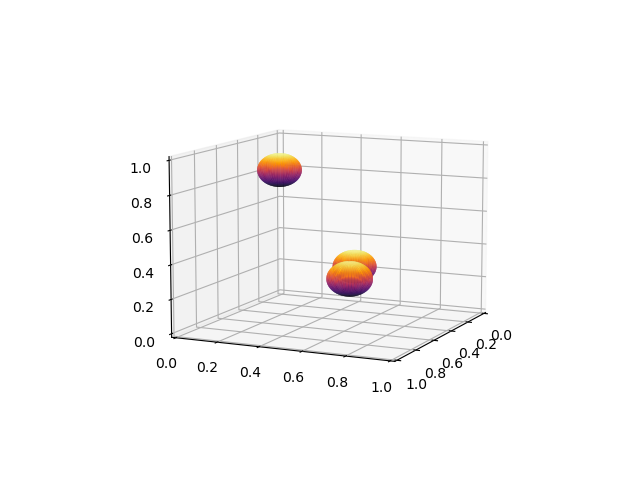

In [9]:
fig = plt.figure()                                     #Animation for 3D hard disks
ax = fig.add_subplot(111, projection='3d')
N=3
sigma = 0.1
delta = 0.2
L = np.asarray(direct_disks_box3D(N, sigma))
ani = animation.FuncAnimation(fig, animate, frames = 500, interval = 0.1)
#ani.save('yourpath/mcmc3D.gif', writer = 'pillow', dpi = 100) 

-------------------------------------------------------------------------

Increasing the density produces the packing of spheres.